#### 컨볼루션 신경망(CNN : Convolutional Neural Network)

In [1]:
# CNN은 이미지뿐만 아니라 텍스트나 음성등 다양한 분야의 데이터 처리에 사용되고 있다.
# 이번 장에서는 CNN 사용법중 가장 기초가 되는 이미지 데이터를 다루는 방법을 알아보자.

# 4장에 나오는 보스턴 주택가격 데이터세트에서는 주택의 가격을 예측하기 위한 주택당 방의 개수, 재산세율, 범죄율 같은
# 특징(feature)들이 있었다. 5장에서 나온 와인 데이터세트에서도 와인의 종류나 품질을 예측하기 위한 당도, 알코올 도수
# 같은 특징들이 데이터로 존재했다.
# 이에 비해 FashionMNIST 같은 이미지 데이터에서는 어떤 특징을 찾을 수 있을까?
# 이미지 데이터에서는 연구자가 스스로 특징을 찾아야 한다. 
# 이미지 특징 추출(Feature Extraction) 기법중 하나인 컨볼루션 연산은 각 픽셀을 본래 픽셀과 그 주변 픽셀의 조합으로
# 대체하는 동작이다. 이때 연산에 사용되는 작은 행렬을 filter 또는 kernel이라고 한다.
# 컨볼루션 연산은 우리말로 합성곱이라고 한다. 원본 이미지의 각 픽셀을 포함한 주변 픽셀과 필터의 모든 픽셀을 각각
# 곱연산을 하고 그 결과들을 모두 합해서 새로운 이미지에 넣어주기 때문에 합성곱이라는 이름을 붙인 것 같다.  

In [2]:
# 간단한 컨볼루션 필터 몇 가지를 소개해보자.
# 3*3 크기의 작은 필터는 필터를 구성하는 셀마다 각각 다른 숫자를 넣어서 원본 이미지의 수직선검출, 수평선검출,
# 흐림(blur), 날카로움(sharpen) 이미지 효과등을 줄 수 있다. 
# 그런데 이런 필터들은 경험적 지식을 통해 직접 손으로 값을 넣어준 결과인 것이다. 이러한 수작업으로 설계한 특징에는
# 다음 세가지의 문제점이 있다. 첫째, 적용하고자 하는 분야에 대한 전문적 지식이 필요하다. 둘째, 수작업으로 특징을 
# 설계하는 것은 시간과 비용이 많이 드는 작업이다. 세째, 한분야(예를 들어 이미지)에서 효과적인 특징을 다른 분야
# (예를 들어 음성)에 적요하기가 어렵다.

# 딥러닝 기반의 컨볼루션 연산은 이런 문제들을 모두 해결했다. 즉 컨볼루션 신경망은 특징을 검출하는 필터를 사람이 
# 수작업으로 설계하는 것이 아니라 네트워크 스스로 특징을 추출하는 필터를 자동으로 생성한다. 
# 학습을 계속하면 네트워크를 구성하는 각 뉴런들은 입력한 데이터에 대해 특정 패턴을 잘 추출할 수 있도록 적응하게 된다.
# 그러면 컨볼루션 신경망은 어떻게 특징을 자동으로 추출하는 것일까? 컨볼루션 신경망의 주요 레이어를 하나씩 살펴보면서
# 그 방법을 알아보기로 하자.

In [3]:
# 주요 레이어 정리

# 지금까지 배운 레이어는 Dense레이어와 Flatten레이어 두 종류였다. Dense레이어는 신경망에서 사용하는 가장 기본적인
# 레이어로 각 뉴런이 서로 완전하게 연결되어 있기 때문에 완전연결레이어(Fully Connected Layer)라고 한다. 
# Flatten레이어는 다차원의 이미지를 1차원으로 평평하게 바꿔주는 단순한 레이어이다.

# 이미지 분류에 사용되는 컨볼루션 신경망은 특징추출기(Feature Extraction)와 분류기(Classifier)가 합쳐져 있는 
# 구조이다. 특징추출기 역할을 하는 것은 convolution layer와 pooling layer이며, Dense layer는 분류기 역할이다.
# cnn -> pooling -> cnn -> pooling -> flatten -> dense ->dropout -> dense가 한가지 예이다.
# cnn과 pooling은 교차되어 배치되고, 분류기에는 Dense레이어가 배치되며, 과적합을 막기 위해 Dropout레이어가 Dense와
# Dense사이에 배치된다. 마지막 Dense레이어 뒤에는 Dropout레이어가 배치되지 않는다. 하나씩 살펴보자

In [4]:
# 컨볼루션 레이어

# 컨볼루션 레이어(Convolution Layer)는 말 그대로 컨볼루션 연산을 하는 레이어이다. 여기서 사용되는 필터는 사람이
# 미리 정해놓은 것이 아니라 네트워크의 학습을 통해 자동으로 추출된다. 우리가 코드에서 지정해야 할 값은 필터를 구성
# 하는 각 셀들의 값들이 아니라 필터의 개수 정도이다.
# 컨볼루션 레이어는 1차원부터 3차원까지 다양하게 사용할 수 있지만 여기서는 가장 기본이 되는 2차원으로 설명한다.

# 컨볼루션 레이어는 각 채널에 대해 계산된 갑을 합쳐서 새로운 이미지를 만들어낸다. 이때 새로운 이미지의 마지막 
# 차원 수는 필터의 수와 동일하다. 일반적인 컨볼루션 신경망은 여러 개의 컨볼루션 레이어를 쌓으면서 뒤쪽으로 갈수록
# 필터의 수를 점점 늘리기 때문에 이미지의 마지막 차원 수는 점점 많아지게 된다.

# 2차원 이미지를 다루는 컨볼루션 레이어를 생성하는 코드는 다음과 같다.
# conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3), strides=(2,2), padding='valid', filters=16)
# Conv2D 레이어를 생성할 때의 주요 매개변수들은 kernel_size, strides, padding, filters의 네가지이다.
# kernel_size는 필터행렬의 크기이다. 수용영역(receptive filed)이라고도 하고 (row수, column수)를 나타내고 하나만 
# 쓰면 row수와 column수를 같게 한다는 의미이다.
# strides는 필터가 계산과정에서 한 스텝마다 이동하는 크기이다. Default값은 (1,1)이고 (2,2)로 설정할 경우 한 칸씩
# 건너뛰면서 계산하게 된다. 동일한 조건에서 strides가 달라지면 결과 이미지의 크기에 영향을 준다.
# padding은 컨볼루션 연산 전에 입력 이미지 주변에 빈 값을 넣을지 지정하는 옵션으로서 'valid'와 'same' 두가지중
# 하나를 사용한다. valid는 빈 값을 사용하지 않는 옵션이고 same은 빈 값을 넣어서 출력 이미지의 크기를 입력과 같도록
# 보존하는 옵션이다. 이때 빈 값으로 0이 쓰이는 경우에 제로 패딩(zero padding)이라고 부른다.
# filters는 필터의 개수이다. 필터의 개수는 네트워크가 얼마나 많은 특징을 추출할 수 있는지 결정하기 떄문에 많을수록
# 좋지만 너무 많을 경우 학습 속도가 느려질 수 있고 과적합이 발생할 수도 있다. 가장 유명한 CNN의 하나인 VGG는 
# 네트워크가 깊어질수록 필터의 수를 2배씩 늘려간다. 

In [5]:
# 풀링 레이어

# 이미지를 구성하는 픽셀중 인접한 픽셀들은 비슷한 정보를 가지고 있는 경우가 많이 있다. 이런 이미지의 크기를 줄이면서
# 중요한 정보만 남기기 위해 subsampling이라는 기법을 사용한다. 메모리의 크기는 제한적이어서 중요 정보만 남기는 과정은
# 효율적인 메모리 사용에 도움이 되고 또 계산할 정보가 줄어들기 때문에 과적합을 방지하는 효과도 있다. 
# 이 과정에서 사용하는 레이어가 Pooling layer이다. Max Pooling layer와 Average Pooling layer가 있다. 
# Conv2D 레이어와 같이 사용되는 MaxPool2D 레이어의 생성코드이다.
# pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))
# pool_size는 한 번에 Max연산을 수행할 범위이다. pool_size=(2,2)이므로 2*2사각형안에서 최댓값만 남기는 연산을 한다.
# strides는 Conv2D레이어에서와 같이 한 스텝마다 이동하는 크기이다.
# pool_size=(2,2)와 strides=(2,2)옵션으로 MaxPool2D레이어를 사용하면 결과 이미지의 크기는 너비, 높이가 각각 절반씩
# 줄어들게 된다. 홀수일 때는 절반에서 내림한 값이 된다.(예:5->2)
# Pooling layer에는 가중치가 존재하지 않기 때문에 학습되지 않으며 네트워크 구조에 따라 생략되기도 한다. 

In [6]:
# 드롭아웃 레이어

# 네트워크의 과적합을 막기 위한 딥러닝 연구자들의 노력의 결과로 Georffrey Hinton교수팀이 "학습과정에서 무작위로 뉴런
# 의 부분집합을 제거하는 것이 뉴런들간의 공모(conspiracy)를 막고 과적합(overfitting)을 감소시킬 것"이라고 했다.
# 위의 언급대로 드롭아웃 레이어는 학습과정에서 무작위로 뉴런의 부분집합을 제거하는 것이다. 네트워크가 학습할 때 같은 
# 레이어에 있는 뉴런들은 결과값에 의해 서로 같은 영향을 받는다. 따라서 각 뉴런의 계산결과를 모두 더해서 나오는 
# 결과값은 한쪽으로 치우치게 되는데 이를 막기 위한 드롭아웃 레이어는 학습과정에서는 확률적으로 일부 뉴런에 대한 영향을
# 끊고 테스트할 때는 정상적으로 모든 값을 계산한다.
# pool1 = tf.keras.layers.Dropout(rate=0.3) 
# rate는 제외할 뉴런의 비율을 나타낸다. 간단한 레이어지만 AlexNet, VGG, GoogLeNet, DenseNet등 거의 모든 주요한 
# CNN에서 이 드롭아웃레이어를 사용됐다. 드롭아웃 레이어도 가중치가 없기 때문에 학습되지 않는다.

In [7]:
# 지금까지 CNN의 중요 레이어들에 대해 알아봤다. 다시 정리해보면 Convolution layer는 특징을 추출하는 역할, Pooling
# layer는 중요한 정보만 남기고 계산부담을 줄여주는 역할, Dropout layer는 과적합을 방지하는 역할을 한다.
# 이중에서 학습이 가능한 것은 Convolution layer뿐이다.

##### Fashion MNIST 데이터세트에 CNN적용하기

In [1]:
# chapter 5에서는 주로 Dense레이어를 이용해서 Fashion MNIST의 분류문제를 풀었다면, chapter 6에서는 새롭게 터득한
# 컨볼루션레이어와 풀링레이어등을 사용해서 분류문제를 풀 때 performance가 얼마나 개선되는지를 알아보도록 하자.
# tf.keras에서 Fashion MNIST 데이터세트를 불러오고 정규화하는 부분은 chapter 5와 동일하다. 그런데 Dense레이어에 
# 훈련데이터와 테스트데이터를 통과시켰던 5장과는 달리 6장에서는 Conv2D레이어로 컨볼루션 연산을 해야 한다. 
# 이미지는 보통 채널을 가지고 있고(컬러 이미지는 RGB의 3채널, 흑백이미지는 1채널), Conv2D레이어는 채널을 가진 형태의
# 데이터를 받도록 기본적으로 설정이 되어 있기 때문에 채널을 갖도록 데이터의 shape를 변경해준다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print([x.shape for x in [train_X, train_Y, test_X, test_Y]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


In [20]:
train_X = train_X / 255.0
test_X = test_X /255.0

In [27]:
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=10)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=10)

In [21]:
# Fashion MNIST 범주들 번호와 매칭하는 dictionary 만들기

fashion_mnist_category_dict = {0 : '티셔츠/상의', 1 : '바지', 2 : '스웨터', 3 : '드레스', 4 : '코트', 
                               5 : '샌들', 6 : '셔츠', 7 : '운동화', 8 : '가방', 9 : '부츠'}

print(fashion_mnist_category_dict)

{0: '티셔츠/상의', 1: '바지', 2: '스웨터', 3: '드레스', 4: '코트', 5: '샌들', 6: '셔츠', 7: '운동화', 8: '가방', 9: '부츠'}


In [28]:
# Fashion MNIST 데이터들은 모두 흑백데이터들이므로 1채널이며 위에서 설명한대로 Conv2D레이어는 채널을 가진 데이터를 
# 받도록 기본적으로 설정돼 있기 때문에 채널차원을 데이터의 가장 뒤쪽에 갖도록 추가하기 위해 reshpae를 한다.

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print([x.shape for x in [train_X, train_Y, test_X, test_Y]])

[(60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10)]


In [23]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "../../fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

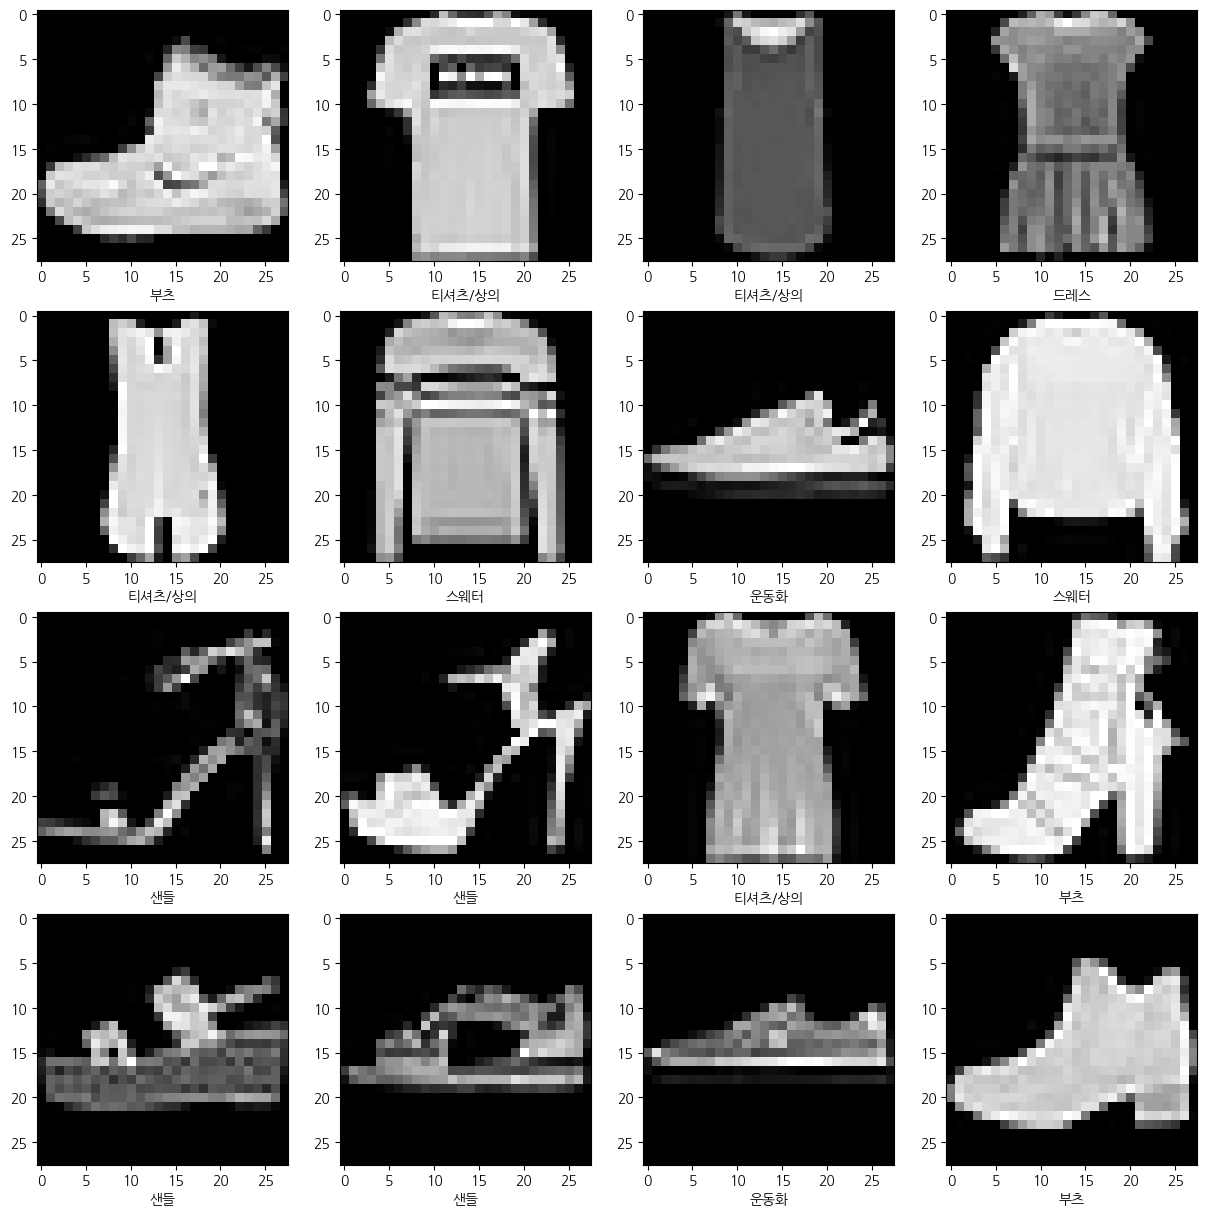

In [24]:
# 데이터를 확인하기 위해 그래플를 그려보자.
plt.figure(figsize=(15, 15))
for c in range(16):
    # 4rows, 4cols로 지정한 grid에서 c+1번째 칸에 그래프를 그리면 1~16번째 칸들을 차례로 채우게 된다.
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    # plt.xlabel(fashion_mnist_category_dict[train_Y[c]])
    
plt.show()

In [29]:
# 먼저 비교를 위해 풀링레이어없이 컨볼루션레이어만 사용한 모델을 정의해보자.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 30976)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3965056   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
No

In [18]:
# 모델에는 총 3개의 Conv2D레이어를 사용했고 그중 첫 레이어의 input_shape은 (1,28,28)로 입력 이미지의 높이,너비,
# 채널 수를 정의하고 있다. 필터의 수는 16,32,64로 뒤로 갈수록 2배씩 늘렸다. Flatten레이어로 다차원 데이터를 
# 1차원으로 정리한 다음에 2개의 Dense레이어를 사용해 분류기를 만들었다.
# 우리가 구축한 모델은 뒤로 갈수록 점점 복잡해지고 파라미터 개수가 많은 네트워크이기때문에 구글 코랩에서는 하드웨어
# 가속기를 사용하지 않으면 계산이 몹시 느릴 수 있다. TPU를 사용할 수도 있지만 현재 2.0버전에서는 코드수정이 요구된다.
# TPU는 병렬처리를 필요로 할 만큼의 큰 데이터를 다룰 때 빛을 발휘하는데 지금은 그 정도로 큰 경우는 아니므로 지금은
# GPU를 사용할 것이다. 그런데 지금 쓰이는 GPU는 어떤 것일까? 다음과 같이 GPU의 사양을 확인해보자.

In [19]:
!nvidia-smi

# NVIDIA GeForce를 사용하고 있음을 확인할 수 있다.

Wed Oct  5 19:17:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   63C    P0    33W /  N/A |   5075MiB /  6144MiB |     46%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:
# history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25


: 

: 